# **Predictive Traffic Risk Modelling for Autonomous Driving (2025 Data)**

## **1. Introduction**

This project aims to leverage historical traffic collision data from the UK Department for Transport (DfT) to **predict high-risk time windows**, enabling proactive interventions for autonomous and assisted driving systems.

### **1.1 Business Objective**

To **predict the traffic accident risk levels in specific future time periods (hour/day/week)** using time series forecasting and machine learning, in order to support safer routing decisions for autonomous driving applications.

### **1.2 Research Questions**

- **temporal patterns** in accident occurrences 
- **forecast accident risk levels** ahead of time
- **features and conditions**contribute most to accident frequency
- **time series models** compare to **ensemble machine learning models** in predictive accuracy


In [ ]:
#Load CSV - 2025 UK DfT Data
import pandas as pd
import numpy as np
from IPython.display import display

collision = pd.read_csv("../data/collision_2025.csv", low_memory=False)
casualty = pd.read_csv("../data/casualty_2025.csv", low_memory=False)
vehicle = pd.read_csv("../data/vehicle_2025.csv", low_memory=False)

## **2.Descriptive Statistics**

This step aims to understand the overall structure, quality, and distribution of variables in the **Collision** ，**Vehicle**，**Casualty** dataset before conducting deeper analysis or model building. It helps:

- Identify variable types (categorical vs. numerical)
- Spot missing or invalid values
- Assess the data range and central tendencies
- Detect potential outliers or anomalies

 > **Basic summary statistics (count, mean, std, min, max, top categories, and unique values) are provided below for each dataset.**

In [2]:
# Dataset Structure Overview
for name, df in zip(['Collision', 'Vehicle', 'Casualty'], [collision, vehicle, casualty]):
    print(f"\n=== {name} Dataset Info ===")
    print(df.info())

# Missing Data Summary
for name, df in zip(['Collision', 'Vehicle', 'Casualty'], [collision, vehicle, casualty]):
    print(f"\n=== {name} Missing Values (%) ===")
    print(df.isnull().mean().sort_values(ascending=False) * 100)

    print(f"\n=== {name} '-1' Coded Missing Values ===")
    print((df == -1).sum().sort_values(ascending=False))

# Basic Descriptive Statistics
for name, df in zip(['Collision', 'Vehicle', 'Casualty'], [collision, vehicle, casualty]):
    print(f"\n=== {name} Descriptive Statistics ===")
    display(df.describe(include='all').T)


# Data Type

from IPython.display import display

def show_data_types(df, name):
    print(f"\nColumn Data Types in {name}:\n")
    df_types = (
        df.dtypes
        .groupby(df.dtypes)
        .apply(lambda x: ', '.join(x.index))
        .reset_index(name='Column Names')
    )
    df_types.columns = ['Data Type', 'Column Names']
    df_types['Number of Columns'] = df.dtypes.value_counts().values
    display(df_types)


show_data_types(collision, 'Collision')
show_data_types(vehicle, 'Vehicle')
show_data_types(casualty, 'Casualty')



=== Collision Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46707 entries, 0 to 46706
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   status                                        46707 non-null  object 
 1   collision_index                               46707 non-null  object 
 2   collision_year                                46707 non-null  int64  
 3   collision_reference                           46707 non-null  object 
 4   location_easting_osgr                         46623 non-null  float64
 5   location_northing_osgr                        46623 non-null  float64
 6   longitude                                     0 non-null      float64
 7   latitude                                      0 non-null      float64
 8   police_force                                  46707 non-null  int64  
 9   legacy_collision_severity    

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
status,46707,1,Unvalidated,46707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collision_index,46707.0,46707.0,2024010486807.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collision_year,46707.0,NaN,NaN,NaN,2024.0,0.0,2024.0,2024.0,2024.0,2024.0,2024.0
collision_reference,46707.0,46707.0,10486807.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_easting_osgr,46623.0,NaN,NaN,NaN,453824.852348,94119.57876,75481.0,389774.5,458787.0,529894.0,654983.0
location_northing_osgr,46623.0,NaN,NaN,NaN,277984.501727,148432.259389,10211.0,175313.5,219154.0,388492.5,1162541.0
longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
police_force,46707.0,NaN,NaN,NaN,27.380564,24.664577,1.0,4.0,21.0,45.0,99.0
legacy_collision_severity,46707.0,NaN,NaN,NaN,2.737042,0.472385,1.0,3.0,3.0,3.0,3.0



=== Vehicle Descriptive Statistics ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
status,84717,1,Unvalidated,84717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collision_index,84717,46707,2024471416027,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collision_year,84717.0,NaN,NaN,NaN,2024.0,0.0,2024.0,2024.0,2024.0,2024.0,2024.0
collision_reference,84717,46707,471416027,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_reference,84717.0,NaN,NaN,NaN,1.550232,1.354315,1.0,1.0,1.0,2.0,203.0
vehicle_type,84717.0,NaN,NaN,NaN,12.377409,17.993502,-1.0,9.0,9.0,9.0,99.0
towing_and_articulation,84717.0,NaN,NaN,NaN,0.265909,1.517105,-1.0,0.0,0.0,0.0,9.0
vehicle_manoeuvre,84717.0,NaN,NaN,NaN,19.836928,25.313807,-1.0,7.0,18.0,18.0,99.0
vehicle_direction_from,84717.0,NaN,NaN,NaN,4.362005,2.828982,-1.0,2.0,5.0,7.0,9.0
vehicle_direction_to,84717.0,NaN,NaN,NaN,4.37591,2.821572,-1.0,2.0,5.0,7.0,9.0



=== Casualty Descriptive Statistics ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
status,59201,1,Unvalidated,59201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collision_index,59201,46707,2024461446505,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collision_year,59201.0,NaN,NaN,NaN,2024.0,0.0,2024.0,2024.0,2024.0,2024.0,2024.0
collision_reference,59201,46707,461446505,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_reference,59201.0,NaN,NaN,NaN,1.441665,1.318199,1.0,1.0,1.0,2.0,203.0
casualty_reference,59201.0,NaN,NaN,NaN,1.341971,1.245938,1.0,1.0,1.0,1.0,202.0
casualty_class,59201.0,NaN,NaN,NaN,1.497728,0.745164,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,59201.0,NaN,NaN,NaN,1.361717,0.5653,-1.0,1.0,1.0,2.0,9.0
age_of_casualty,59201.0,NaN,NaN,NaN,37.410956,19.993474,-1.0,22.0,35.0,51.0,120.0
age_band_of_casualty,59201.0,NaN,NaN,NaN,6.364673,2.494846,-1.0,5.0,6.0,8.0,11.0



Column Data Types in Collision:



,Data Type,Column Names,Number of Columns
0,int64,"collision_year, police_force, legacy_collision...",27
1,float64,"location_easting_osgr, location_northing_osgr,...",7
2,object,"status, collision_index, collision_reference, ...",4



Column Data Types in Vehicle:



,Data Type,Column Names,Number of Columns
0,int64,"collision_year, vehicle_reference, vehicle_typ...",26
1,object,"status, collision_index, collision_reference, ...",4



Column Data Types in Casualty:



,Data Type,Column Names,Number of Columns
0,int64,"collision_year, vehicle_reference, casualty_re...",17
1,object,"status, collision_index, collision_reference, ...",4



### **Conclusion of Stastistic Description**

**1. Collision**

- **Description**：Each row in this dataset represents a single traffic accident reported in the UK.
- **Purpose**：This dataset help identify which factors are most frequent.
- **Data Structure**：38 features，including 27 integer-coded variables (mostly categorical), 7 float-type (geospatial), and 4 object-type (IDs and timestamps).
- **Missing Data**: Key geolocation fields `longitude`, `latitude` are fully missing，15 variables use '-1' to encode missing values, these fields require conversion to NaN for correct preprocessing

**2. Vehicle**

- **Description**: Each row records a vehicle involved in a UK traffic accident (2024).
- **Purpose**: Used to analyze vehicle type, driver profile, and maneuver data.
- **Data Structure**: 30 features including 26 integer-coded (mostly categorical), 4 object-type (IDs).
- **Missing Data**:  
  - No standard NaNs  
  - 22 fields use `-1` to encode missing info. These should be converted to `NaN` for analysis
 

**3. Casualty**

- **Description**: Each row is an individual casualty from a UK road accident.
- **Purpose**: Supports analysis of injury severity, demographics, and casualty types.
- **Data Structure**: 20 features，including 14 integer-coded (mostly categorical), 6 object-type.
- **Missing Data**:  
  - No NaNs, but 12 fields use `-1` as missing code  
  - Key affected fields: `enhanced_casualty_severity` (23K), `casualty_imd_decile`, `age_of_casualty`



## **3. Exploratory Data Analysis (EDA)**

EDA **objective** is to investigate the *structure*, *distribution*, *correlation patterns*, and *anomalies* in the dataset, to inform robust feature engineering and predictive modeling design. At the same time，given the **business goal**, EDA should focus on two key analytical dimensions: temporal trends and accident severity patterns:
- **Temporal Trends**
- **Categorical Feature Distribution**
- **Numerical Feature Distribution**
- **Target Variable Analysis**
- **Correlation Analysis**
- **Missing Value Analysis**
- **Duplicate Value Analysis**

> But *before the EDA,* **processing data and merging dataset** for the EDA


#### **3.1 Dataset Merging**


##### **3.1.1 Preprocessing for Merging and EDA**
To ensure high-quality analysis and seamless merging of the three datasets (`collision`, `vehicle`, and `casualty`), the following cleaning procedures were applied:
1. Remove Leading and Trailing Spaces from Column Names
2. Convert ID Fields to String Type
3. Replace `-1` Coded Missing Values with `NaN`
4. Drop Duplicate Rows
5. Drop Fully Empty Columns
6. Reset Index

In [3]:
def df_dataframe(df, source_name=None):
    # 1. Strip column names
    df.columns = df.columns.str.strip()
    
    # 2. Convert ID fields to string
    id_fields = ['collision_index', 'collision_reference', 'vehicle_reference', 'casualty_reference']
    for col in id_fields:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()
    
    # 3. Replace -1 with NaN
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols] = df[num_cols].replace(-1, np.nan)
    
    # 4. Drop duplicate rows
    df = df.drop_duplicates()
    
    # 5. Drop fully empty columns
    df = df.dropna(axis=1, how='all')
    
    # 6. Reset index
    df = df.reset_index(drop=True)
    
    # 7. Optional: Add source name column
    if source_name:
        df['source_table'] = source_name
    
    return df

# Apply to each dataframe
collision = df_dataframe(collision, source_name='collision')
vehicle = df_dataframe(vehicle, source_name='vehicle')
casualty = df_dataframe(casualty, source_name='casualty')


##### **3.1.2 Merge Design**

**Merging Logic:** 

Based on the business object: to predict the accident risk-level in time rolling, it requires as many as accident samples,so the Key Dataset, Data Requirements and the Merging Methods as follows:

**Key dataset:** `collision`

**Data Requirements:**
  - Each row = 1 accident + associated time + vehicle + context + casualty info (if any)
  - Must retain all accident records, even those with:
    - No vehicle data
    - No casualties
  - Time features (`hour`, `day`, `week`) must be preserved for forecasting

**Merging Method:**
1. **Collision + Vehicle**
     - **Key:** collision_index
     - **Join type:** left
     - **Why:** Keep all accidents, even if vehicle info is missing (1 accident → many vehicles).
2. **+ Casualty**
   - **Key:**  `collision_index + vehicle_reference`
   - **Join type:** left
   - **Why:** Keep all accident + vehicle records, even if no injury occurred.

In [4]:
# Step 1: Merge Collision + Vehicle
merged = pd.merge(
    collision,
    vehicle,
    on='collision_index',
    how='left', 
    indicator='merge_vehicle'
)

# Step 2: Merge + Casualty
full_data = pd.merge(
    merged,
    casualty,
    on=['collision_index', 'vehicle_reference'],
    how='left', 
    indicator='merge_casualty'
)

# Step 3: Clean duplicate columns 
full_data = full_data.loc[:, ~full_data.columns.duplicated()]

# Step 4: Save merged result
full_data.to_csv("full_data_for_modeling.csv", index=False, encoding='utf-8-sig')

# check the merging results
print("Unique accident records:", full_data['collision_index'].nunique())
print("Total vehicle records:", full_data['vehicle_reference'].notna().sum())
print("Total casualty records:", full_data['casualty_reference'].notna().sum())


Unique accident records: 46707
Total vehicle records: 92541
Total casualty records: 59201


**Conlusion after Merging Dataset**

| Entity     | Description                             | Count        | Avg. per Accident |
|------------|-----------------------------------------|--------------|-------------------|
| **Accident** | Each row = one unique accident (`collision_index`) | 46,707        | -                 |
| **Vehicle**  | Each row = one vehicle involved in an accident     | 92,541        | ~1.98             |
| **Casualty** | Each row = one injured or killed person            | 59,201        | ~1.27             |


##### **3.1.3 Post-Merge Cleaning Steps**

1. **Standardize Missing Values**
   - Replace all coded missing values (`-1`, `99`, `'Unknown'`, etc.) with `NaN`.

2. **Remove Duplicate Merge Columns**
   - Drop `_y` columns if `_x` versions exist
     
3. **Ensure Unique Column Names**
   - Removed duplicated column names to prevent assignment errors:

4. **Drop Unique ID Columns**
   - Remove any columns that have a unique value per row (not useful for modeling).

5. **Extract Time Features**
   - From `date_x` and `time_x`, generate:
     - `hour`, `day`, `month`
     - `time_slot_15min`

6. **Map Label Columns**
   - Convert numeric codes to human-readable categories.

7. **Save Final Dataset**
   - Export the cleaned and labeled dataset for model training and analysis.


In [5]:
import pandas as pd
import numpy as np

# 1. Standardize missing values
full_data.replace(
    to_replace=[-1, 99, 'Unknown', 'unknown', 'Not known', 'Unknown (self reported only)'],
    value=np.nan,
    inplace=True
)

# 2. Remove duplicate merge columns
x_cols = [col for col in full_data.columns if col.endswith('_x')]
y_cols_drop = [col for col in full_data.columns if col.endswith('_y') and col.replace('_y', '_x') in x_cols]
full_data.drop(columns=y_cols_drop, inplace=True)

# 3. Ensure no duplicate column names 
full_data = full_data.loc[:, ~full_data.columns.duplicated()].copy()

# 4. Drop ID columns
uni_cols = [col for col in full_data.columns if full_data[col].nunique() == full_data.shape[0]]
full_data.drop(columns=uni_cols, inplace=True)

# 5. Extract datetime features
date_col = [col for col in full_data.columns if 'date' in col.lower()][0]
time_col = [col for col in full_data.columns if 'time' in col.lower()][0]

full_data['datetime'] = pd.to_datetime(
    full_data[date_col] + ' ' + full_data[time_col],
    errors='coerce',
    dayfirst=True
)
full_data = full_data[full_data['datetime'].notna()].copy()
full_data['hour'] = full_data['datetime'].dt.hour
full_data['day'] = full_data['datetime'].dt.day_name()
full_data['month'] = full_data['datetime'].dt.month
full_data['time_slot_15min'] = full_data['hour'] * 4 + (full_data['datetime'].dt.minute // 15)


# 6. Define label mappings
label_maps = {
    'casualty_severity': {1: 'Fatal', 2: 'Serious', 3: 'Slight'},
    'urban_or_rural_area': {1: 'Urban', 2: 'Rural'},
    'road_surface_conditions': {1: 'Dry', 2: 'Wet/Damp', 3: 'Snow', 4: 'Frost/Ice', 5: 'Flood', 6: 'Oil', 7: 'Mud', 9: 'Unknown'},
    'light_conditions': {1: 'Daylight', 4: 'Dark-lit', 5: 'Dark-unlit', 6: 'Dark-no lighting', 7: 'Lighting unknown'},
    'weather_conditions': {1: 'Fine (no wind)', 2: 'Rain (no wind)', 3: 'Snow (no wind)', 4: 'Fine (wind)', 5: 'Rain (wind)', 6: 'Snow (wind)', 7: 'Fog/mist', 8: 'Other', 9: 'Unknown'},
    'junction_detail': {0: 'Not at or within 20m', 13: 'T or staggered', 16: 'Crossroads', 17: '>4 arms', 18: 'Private entrance', 19: 'Other junction', 99: 'Unknown'},
    'junction_control': {1: 'Authorised person', 2: 'Auto signal', 3: 'Stop sign', 4: 'Give way/uncontrolled', 9: 'Unknown'},
    'road_type': {1: 'Roundabout', 2: 'One-way', 3: 'Dual carriageway', 6: 'Single carriageway', 7: 'Slip Road', 9: 'Unknown'},
    'vehicle_type': {1: 'Motorcycle <=50cc', 2: 'Motorcycle <=125cc', 3: 'Motorcycle <=500cc', 4: 'Motorcycle >500cc', 5: 'Taxi', 8: 'Minibus', 9: 'Bus/Coach', 10: 'Tram', 11: 'Van <=3.5t', 14: 'Goods 3.5-7.5t', 16: 'Goods >7.5t', 17: 'Mobility scooter', 18: 'Electric motorcycle', 19: 'Pedal cycle', 20: 'Other', 21: 'Ridden horse', 97: 'MC unknown cc', 98: 'Goods unknown weight', 99: 'Unknown'},
    'vehicle_manoeuvre': {1: 'Reversing', 2: 'Parked', 3: 'Held up', 4: 'Slowing/stopping', 5: 'Moving off', 6: 'U-turn', 7: 'Turning left', 8: 'Waiting to turn left', 9: 'Turning right', 10: 'Waiting to turn right', 11: 'Changing lane left', 12: 'Changing lane right', 13: 'Overtaking nearside', 14: 'Overtaking offside', 15: 'Ahead left bend', 16: 'Ahead right bend', 17: 'Going ahead other', 99: 'Unknown'}
}

# Apply label mappings
for col, mapping in label_maps.items():
    if col in full_data.columns:
        full_data[col + '_label'] = full_data[col].astype(float).map(mapping)

# 7.Save file
full_data.to_csv("final_cleaned_labeled_dataset.csv", index=False, encoding='utf-8-sig')



#### **3.3 Explore Features Quality**

Check key aspects to ensure data is ready for analysis:

1. **Missing Values**  
   - Count missing data per column  
2. **Unique Values (Cardinality)**  
   - Count distinct values to identify categorical variables  
3. **Duplicates**  
   - Find and remove duplicate rows and columns or IDs  
4. **Outliers**  
   - Detect extreme or invalid values  
5. **Data Types**  
   - Confirm fields have correct data types  


In [6]:
import pandas as pd
import numpy as np

# 1. Basic feature summary
feature_overview = pd.DataFrame({
    'dtype':       full_data.dtypes,
    'n_unique':    full_data.nunique(),
    'n_missing':   full_data.isna().sum()
})
feature_overview['missing_rate'] = feature_overview['n_missing'] / len(full_data)

# 2. Mark features to keep for EDA
feature_overview['keep'] = np.where(
    (feature_overview['missing_rate'] < 0.2) & (feature_overview['n_unique'] < 20),
    '✅', '❌'
)

# 3. Duplicate‐row check
n_dup_rows = full_data.duplicated().sum()
print(f"Duplicated rows in dataset: {n_dup_rows}")

# 4. Check for duplicate column names
duplicated_cols = full_data.columns[full_data.columns.duplicated()]
n_dup_cols = len(duplicated_cols)
print(f"Duplicated column names: {duplicated_cols.tolist()}")
print(f"Number of duplicated column names: {n_dup_cols}")


# 5. Outlier count for numeric columns (IQR method)
num_cols = full_data.select_dtypes(include=[np.number]).columns
outlier_counts = {}
for col in num_cols:
    q1, q3 = full_data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    mask = (full_data[col] < q1 - 1.5*iqr) | (full_data[col] > q3 + 1.5*iqr)
    outlier_counts[col] = int(mask.sum())
feature_overview['outlier_count'] = feature_overview.index.map(outlier_counts).fillna(0).astype(int)

# Remove duplicated column names
full_data = full_data.loc[:, ~full_data.columns.duplicated()].copy()


# 6. Display results
pd.set_option('display.max_rows', None)
print(feature_overview[['dtype','n_unique','n_missing','missing_rate','outlier_count','keep']])

Duplicated rows in dataset: 0
Duplicated column names: []
Number of duplicated column names: 0
                                                       dtype  n_unique  \
status_x                                              object         1   
collision_index                                       object     46707   
collision_year_x                                       int64         1   
collision_reference_x                                 object     46707   
location_easting_osgr                                float64     42137   
location_northing_osgr                               float64     42125   
police_force                                         float64        42   
legacy_collision_severity                              int64         3   
number_of_vehicles                                     int64        15   
number_of_casualties                                   int64        14   
date                                                  object       182   
day_of_week      

##### **Data Quality Summary & Actions**

**Summary:**

1. **Duplicate Records**  
   - `Duplicated rows = 0`

2. **Core Features to Keep (✅)**  
   - **Temporal Trends**: `day`, `month`  
   - **Environmental**: `weather_conditions_label`, `light_conditions_label`, `road_surface_conditions_label`  
   - **Road & Vehicle**: `road_type_label`, `vehicle_type_label`  
   - **Basic Stats**: `legacy_collision_severity`, `number_of_vehicles`, `number_of_casualties`, `first_road_class`, `speed_limit`  
   - **Binary Flags**: `escooter_flag`, `pedestrian_crossing_human_control`, `did_police_officer_attend_scene_of_collision`, `merge_casualty`

3. **Features to Drop or Defer (❌)**  
   - High‐cardinality or very high missing rate: `collision_index`, `lsoa_of_driver`, any `*_reference` or `casualty_*` fields  
   - ID/location fields with >40% missing or unique values ≈ sample size

4. **Borderline Features**  
   - `hour`, `time_slot_15min`: Business-critical but many unique values—consider density plots or line charts  
   - `age_of_driver` (14.8% missing), `driver_imd_decile` (22.2% missing): If retained, impute missing values (median or stratified)

5. **Outliers**  
   - Many numeric columns show numerous boxplot outliers (`outlier_count`)
   - Recommended handling: IQR capping or flagging extreme values as high-risk samples

**Data Processing Recommendations**

1. **Drop unnecessary ID/reference fields**  
   Remove high-cardinality columns (e.g. collision_index, collision_reference, lsoa_of_driver).

2. **Handle missing values**  
   - Fill numerical columns with moderate missingness (<20%) using median values.  
   - Impute rare categorical gaps with the most frequent category.  
   - Exclude or defer columns with very high missing rates (>40%) unless critically needed.

3. **Treat outliers**  
   Apply a consistent capping strategy (e.g. IQR-based limits) to key numeric fields (such as speed_limit, number_of_vehicles, age_of_driver) to reduce extreme values’ impact.

4. **Aggregate time features**  
   For high-cardinality time variables (`hour`, `time_slot_15min`), create broader bins or compute summary statistics (e.g. average accidents per hour) to simplify analysis and visualization.


#### **3.4 Explore Data Analysis**

We selected features based on:

1. **Data Quality**: Appropriate data type, low missing rate (<20%), and moderate unique values (<20)  
2. **Business Relevance**: Aligns with predicting high-risk time periods for autonomous driving

**Selected Features:**

- **Temporal Trends**: `hour`, `day`, `month`, `time_slot_15min`
- **Categorical Features**:
 - **Environmental Features**: `weather_conditions_label`, `light_conditions_label`, `road_surface_conditions_label`
 - **Road & Vehicle Features**: `road_type_label`, `vehicle_type_label` 
- **Numerical Features**: `number_of_vehicles`, `number_of_casualties` 
- **Target Variable**: `casualty_severity_label` 


##### **3.4.1 Explore Temporal Trends**
- Convert and extract datetime components
- Accident distribution over:
  - 15-minute time slots
  - Hour of day
  - Day of week
  - Month
- Daily accident trend and 7-day rolling average

C:\Users\olivi\AppData\Local\Temp\ipykernel_20660\411646738.py:4: DtypeWarning: Columns (1,3,59) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv("final_cleaned_labeled_dataset.csv", encoding='utf-8-sig')


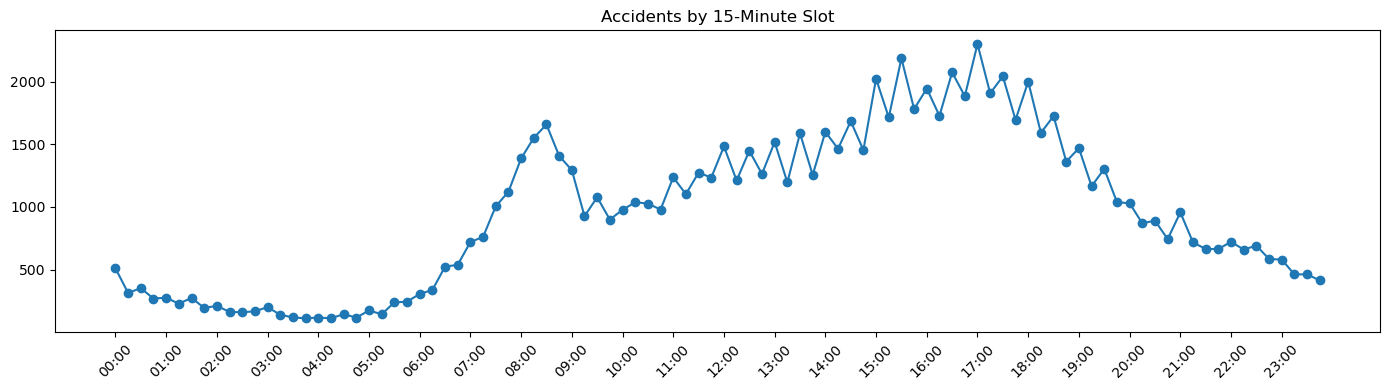

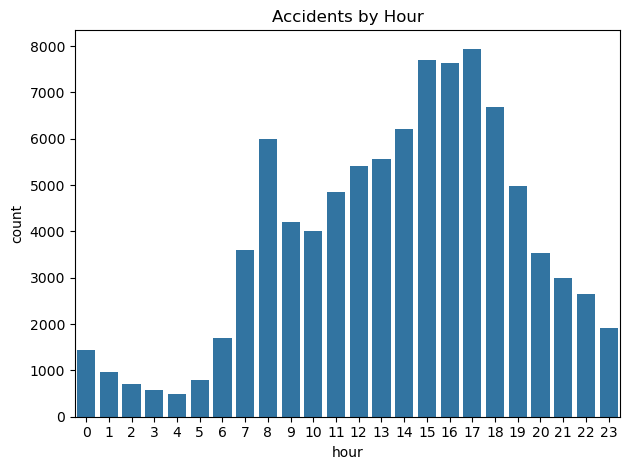

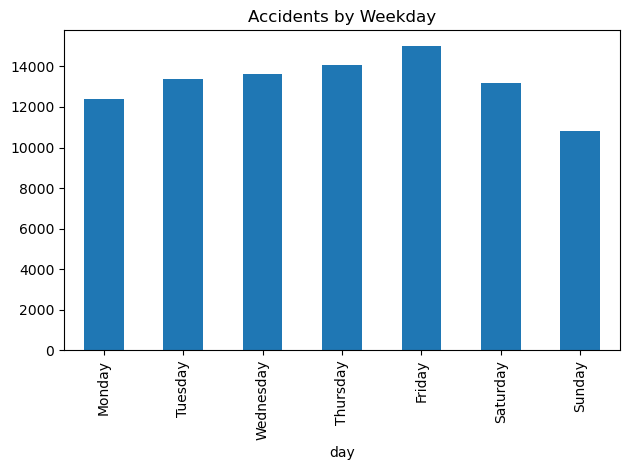

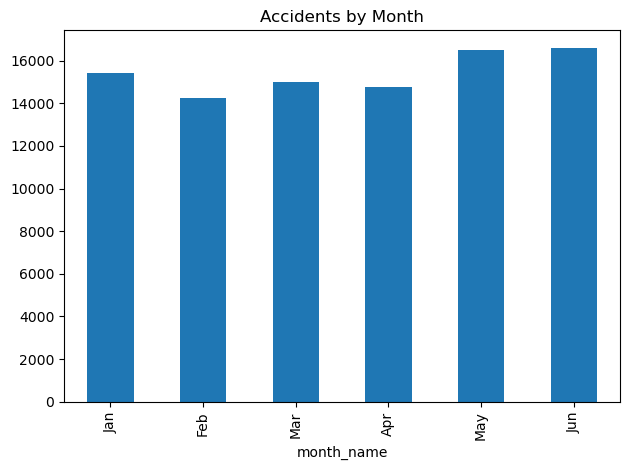

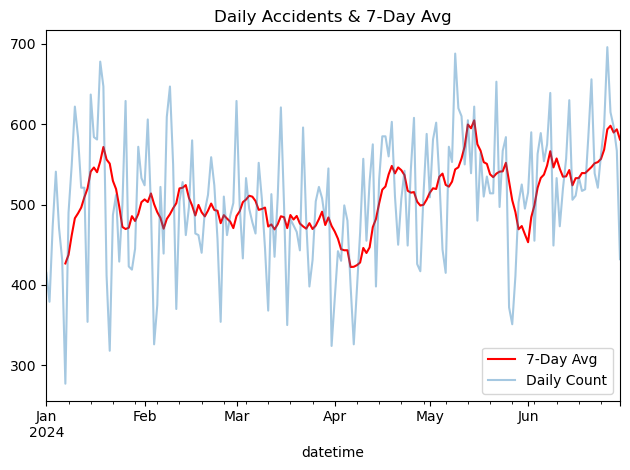

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

full_data = pd.read_csv("final_cleaned_labeled_dataset.csv", encoding='utf-8-sig')

# 15 mins slot accident
ts15 = full_data['time_slot_15min'].value_counts().sort_index()
plt.figure(figsize=(14,4))
plt.plot(ts15.index, ts15.values, marker='o')
plt.xticks([i * 4 for i in range(24)], [f'{i:02d}:00' for i in range(24)], rotation=45)
plt.title("Accidents by 15-Minute Slot")
plt.tight_layout()
plt.show()

# hour accident
sns.countplot(x='hour', data=full_data.reset_index())
plt.title("Accidents by Hour")
plt.tight_layout()
plt.show()

# week accident
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
full_data['day'].value_counts().reindex(weekday_order).plot(kind='bar', title="Accidents by Weekday")
plt.tight_layout()
plt.show()

# month accident
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun'}
full_data['month_name'] = full_data['month'].map(month_names)
full_data['month_name'].value_counts().reindex(month_names.values()).plot(kind='bar', title="Accidents by Month")
plt.tight_layout()
plt.show()

# 
full_data['datetime'] = pd.to_datetime(full_data['datetime'], errors='coerce')
full_data = full_data[full_data['datetime'].notna()].copy()
full_data.set_index('datetime', inplace=True)

daily = full_data.resample('D').size()
daily.rolling(7).mean().plot(label='7-Day Avg', color='red')
daily.plot(alpha=0.4, label='Daily Count')
plt.title("Daily Accidents & 7-Day Avg")
plt.legend()
plt.tight_layout()
plt.show()


**Conlusion in Temporal Trend**

1. **Accident Distribution by 15-Minute Slots**
- Before 6:00 AM, the number of accidents remains low.
- Rush Hour: 8:00–9:00 AM
- Peak Hour: 3:00–6:00 PM

2. **Accident Distribution by Weekday**
- Friday shows the highest number of accidents,
- Sunday records the lowest accident count.

3. **Accident Distribution by Month (Jan–June)**
- Accident numbers generally increase from January to June.
- June has the highest point.

4. **Accident Daily Trend in 7 days rolling**
- Peaks in accident numbers in late May and mid-January.

**Summary**
Peak hours (around 3:00–6:00 PM ), Fridays and the month of June require special attention for accident prevention.

##### **3.4.2 Categorical Feature Distribution**
Frequency bar charts for features such as:
  - **Environmental Features**: `weather_conditions_label`, `light_conditions_label`, `road_surface_conditions_label`
  - **Road & Vehicle Features**: `road_type_label`, `vehicle_type_label` 

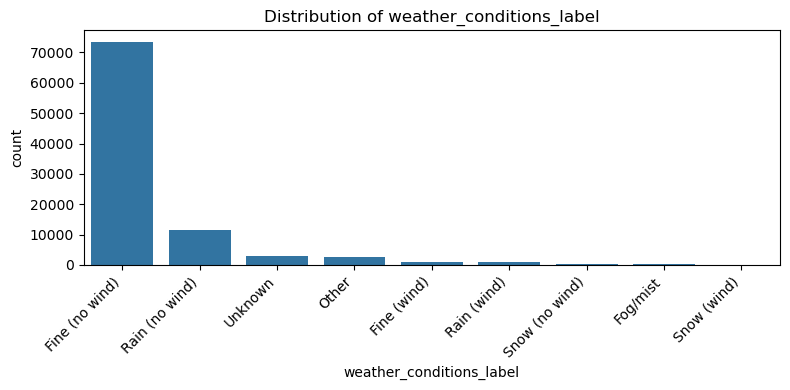

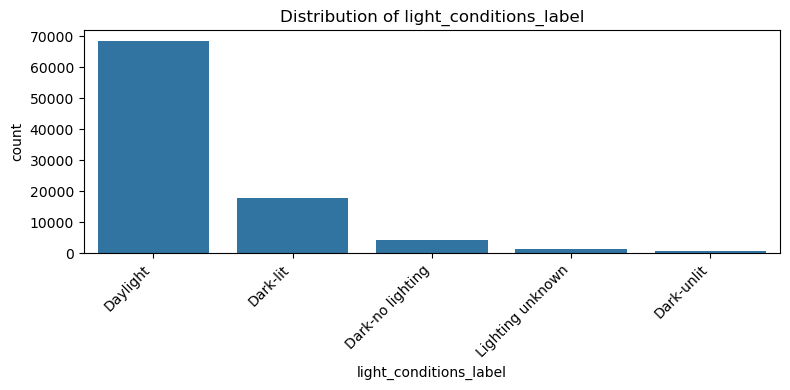

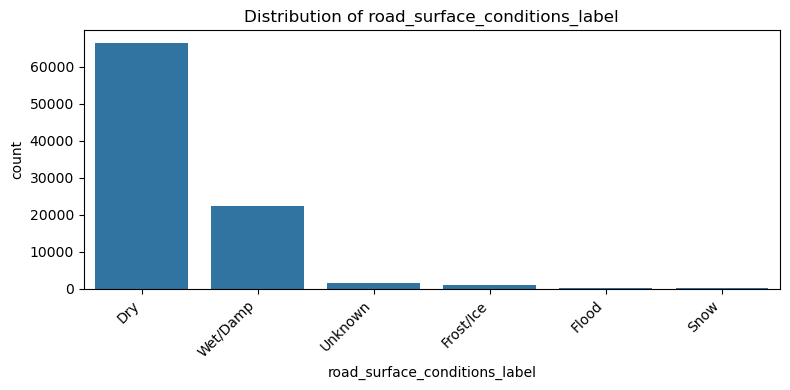

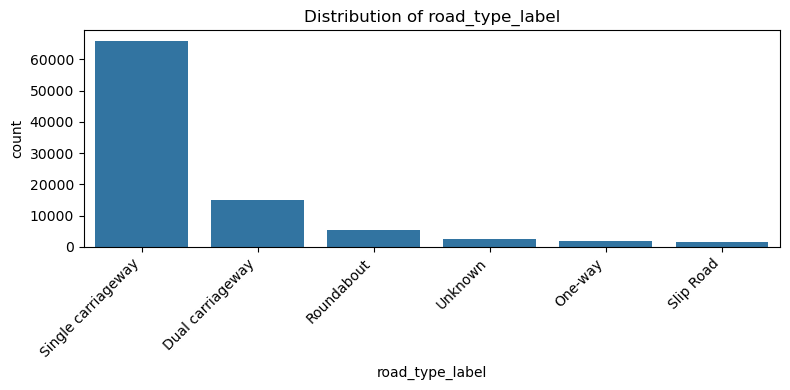

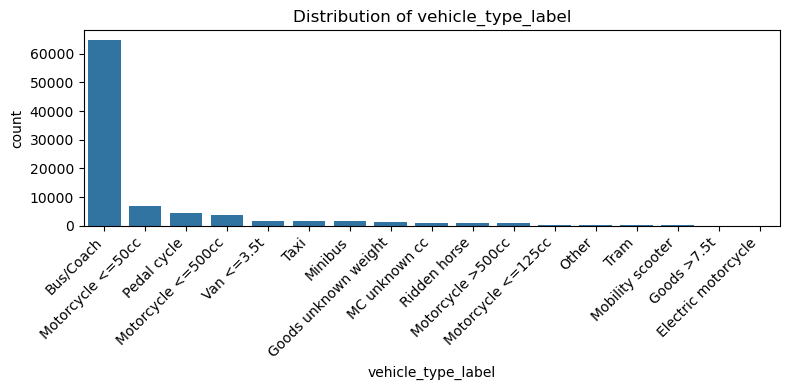

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove duplicated column names if any
full_data = full_data.loc[:, ~full_data.columns.duplicated()].copy()

# Define categorical features to visualize
categorical_features = [
    'weather_conditions_label',
    'light_conditions_label',
    'road_surface_conditions_label',
    'road_type_label',
    'vehicle_type_label'
]

# Plot bar chart for each categorical feature
for feature in categorical_features:
    if feature in full_data.columns:
        plt.figure(figsize=(8, 4))
        data_plot = full_data[[feature]].dropna().copy()
        sns.countplot(
            data=data_plot,
            x=feature,
            order=data_plot[feature].value_counts().index.tolist()
        )
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Distribution of {feature}')
        plt.tight_layout()
        plt.show()
    else:
        print(f" Column not found: {feature}")


##### **Categorical Feature Distribution Summary**

- **Weather**: Most accidents occurred during **fine (no wind)** conditions, followed by **rain (no wind)**. Good weather does not guarantee safety.
- **Light**: Majority happened in **daylight**, with **dark-lit** as the second most common. Poor lighting may increase risk.
- **Road Surface**: Accidents mostly occurred on **dry roads**. Although **wet/icy** surfaces are less frequent, they are still hazardous.
- **Road Type**: **Single carriageway** is the most frequent. Less common types like **roundabouts** and **slip roads** may need special attention.
- **Vehicle Type**: **Buses/coaches** are involved most often, followed by **motorcycles** and **pedal cycles**, which are vulnerable road users.

##### **3.4.3 Numerical Feature Distribution**
- Histograms, boxplots for:
 - `number_of_vehicles`
 - `number_of_casualties`

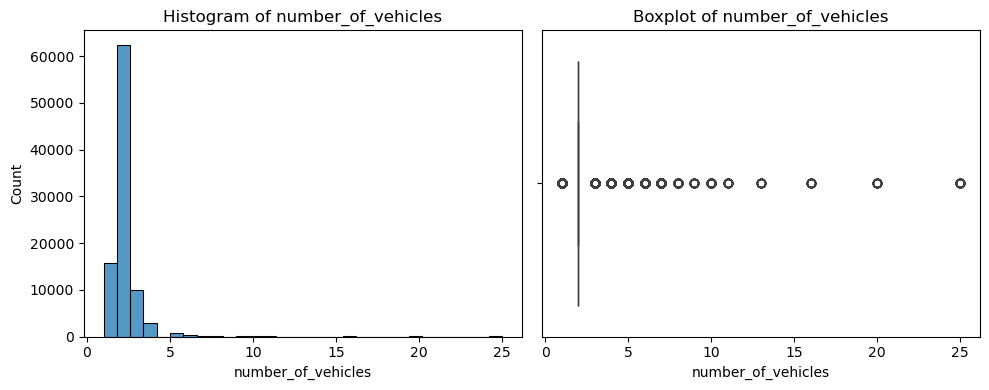

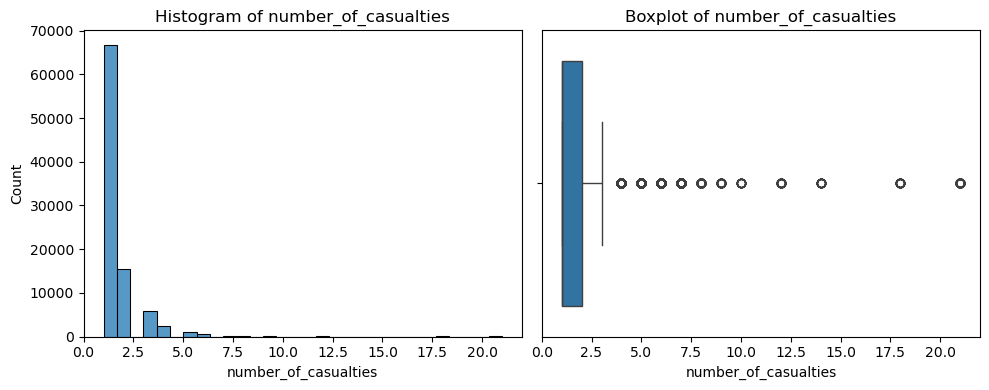

In [9]:
for col in ['number_of_vehicles', 'number_of_casualties']:
    if col in full_data.columns:
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(full_data[col].dropna(), bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=full_data[col].dropna())
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()


##### **Numerical Feature Distribution Summary**

- Most accidents involve ≤2 vehicles or casualties.
- Both features are right-skewed with outliers.
- Consider outlier handling or transformation before modeling.

##### **3.4.4 Target Variable Analysis**
- Distribution of accident severity 'casualty_severity_label'
- Severity vs time (heatmap/line plot)
- Severity vs categorical features (boxplot/grouped bar)
- Severity vs numerical features(boxplots)


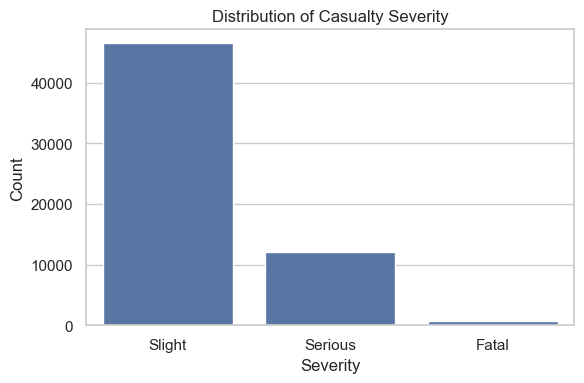

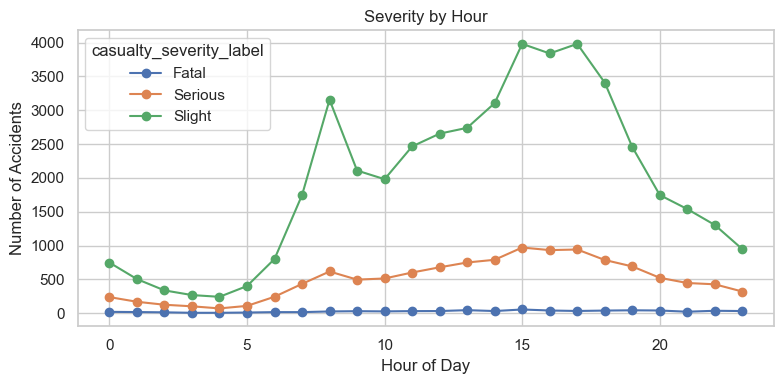

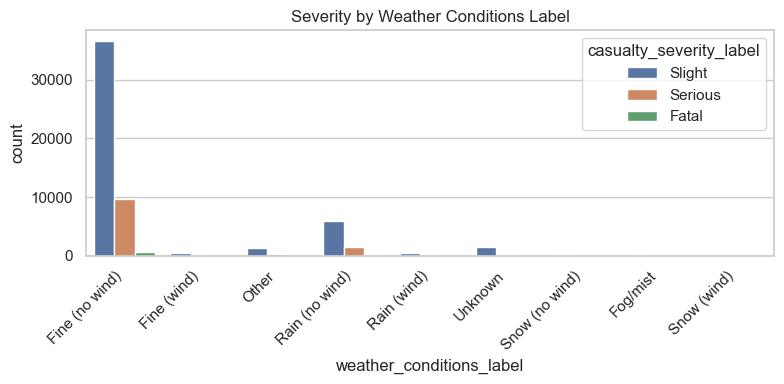

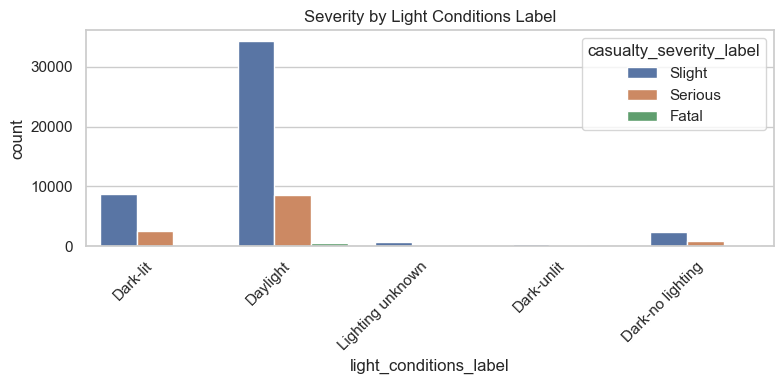

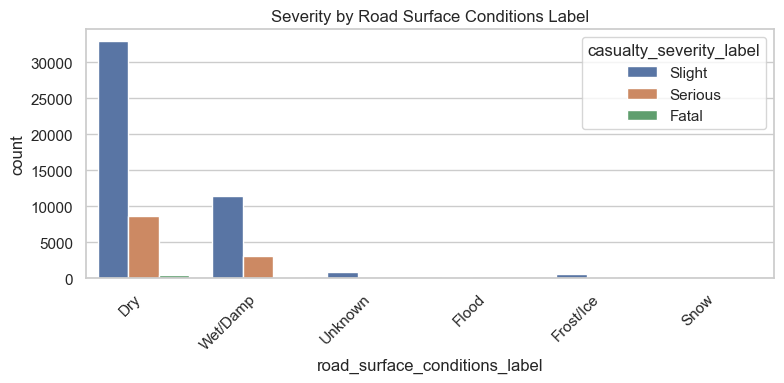

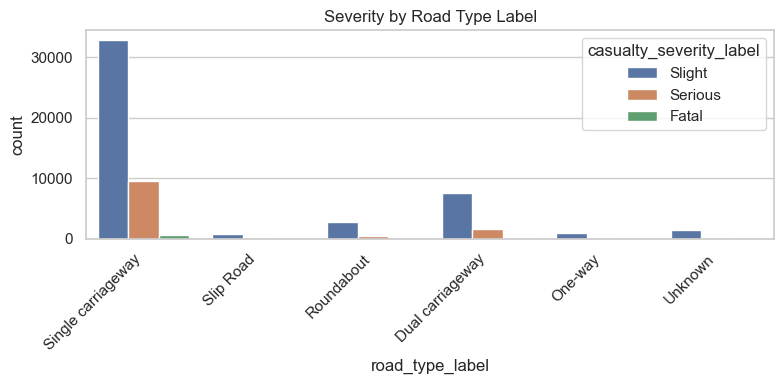

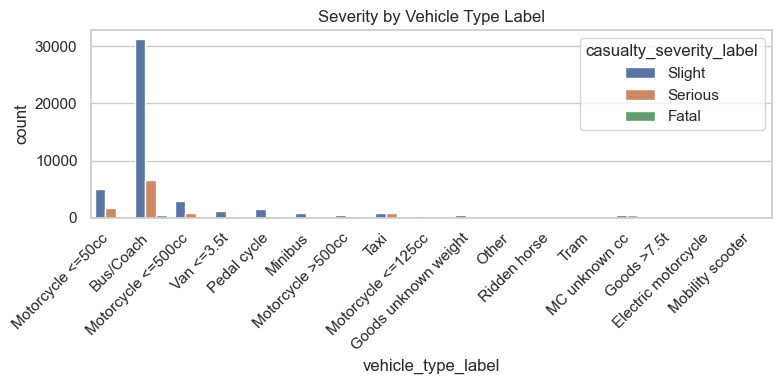

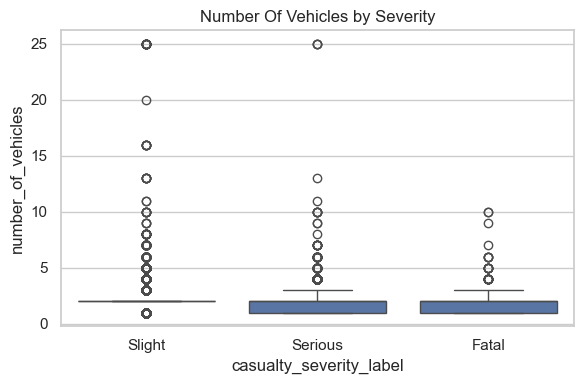

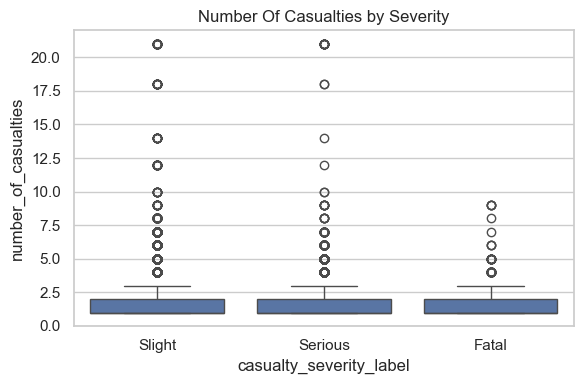

In [10]:
full_data = full_data.loc[:, ~full_data.columns.duplicated()].copy()  # ensure unique columns
full_data.reset_index(drop=True, inplace=True)                        # ensure unique row index


# ----------------------------------------------------------------------------
# 3.4.4 Target Variable Analysis
# ----------------------------------------------------------------------------

sns.set(style="whitegrid")

# 1. Severity distribution
plt.figure(figsize=(6,4))
sns.countplot(x='casualty_severity_label', data=full_data)
plt.title("Distribution of Casualty Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Severity vs time (line plot by hour)
if 'hour' in full_data:
    hourly = full_data.groupby('hour')['casualty_severity_label'] \
                      .value_counts() \
                      .unstack(fill_value=0)
    hourly.plot(kind='line', marker='o', figsize=(8,4))
    plt.title("Severity by Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Accidents")
    plt.tight_layout()
    plt.show()

# 3. Severity vs categorical features (grouped bar)
for col in ['weather_conditions_label', 'light_conditions_label',
            'road_surface_conditions_label', 'road_type_label',
            'vehicle_type_label']:
    if col in full_data:
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue='casualty_severity_label', data=full_data)
        plt.title(f"Severity by {col.replace('_',' ').title()}")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# 4. Severity vs numerical features (boxplots)
for col in ['number_of_vehicles','number_of_casualties']:
    if col in full_data:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='casualty_severity_label', y=col, data=full_data)
        plt.title(f"{col.replace('_',' ').title()} by Severity")
        plt.tight_layout()
        plt.show()


##### Target-Variable Insights  

- **Class balance**  
  *Slight* ≈ 80 %, *Serious* ≈ 19 %, *Fatal* < 1 % → strong imbalance.

- **Temporal pattern**  
  Clear rush-hour spikes (07-10 h, 15-19 h) for every severity; *Slight* peaks around 16 h.

- **Weather**  
  Most crashes in **fine, dry weather**; rain increases counts modestly; extremes (snow, fog, wind) are rare.

- **Light conditions**  
  Majority in **daylight**; relative share of *Serious/Fatal* rises under dark-lit conditions.

- **Road surface**  
  **Dry** dominates; *Serious* share grows on **wet/damp** roads.

- **Road type**  
  **Single carriageway** carries the bulk of crashes for all severities.

- **Vehicle type**  
  Bus/coach and small motorcycles drive *Slight* counts; **motorcycles** contribute a larger proportion of *Serious/Fatal* cases.

- **Numeric features**  
  – Both `number_of_vehicles` and `number_of_casualties` are heavily right-skewed.  
  – Typical accident: 1–2 vehicles, 1–2 casualties; rare outliers > 10.

---

**Processing Suggestions**  

- **Handle class imbalance**: stratified split + class weights or SMOTE.  
- **Engineer time flags**: rush-hour indicator, hour sine/cosine, weekend vs weekday.  
- **Binary environment flags**: darkness, rain/wet, wet × dark interaction.  
- **Road context**: single vs dual carriageway, junction type as categorical encoding.  
- **Vehicle risk features**: one-hot or target encoding for major vehicle classes.  
- **Transform skewed numerics**: log/clip extreme counts of vehicles & casualties.  
- **Robustness to outliers**: use tree-based models or winsorize extremes.


##### **3.4.5 Correlation Analysis**
- **Feature multicollinearity risk**
  Two or more independent variables (features) are highly linearly correlated. When this occurs, the model struggles to determine which variable has a stronger impact on the target, leading to instability, interpretability issues, and reduced predictive performance.

##### **Issues Identified in Multicollinearity Check**

- `time_slot_15min` and `hour` (VIF ≈ 317)  
   **`hour`** is more interpretable

- `age_of_casualty` / `age_band_of_casualty` /`age_of_driver` / `age_band_of_driver` (VIF ≈ 49 / 44/ 48 / 43)  
  **`age_band`** which is more suitable for classification models.

- `legacy_collision_severity`,`casualty_severity` and `enhanced_casualty_severity` (VIF ≈ 9.5 /12/ 11)  
   **legacy_`** should be **left**.

- `vehicle_reference`, `casualty_reference`, `collision_year_x/y`  
  These are **index-like identifiers** (VIF = 0 or irrelevant for modeling). They should be **excluded** from feature sets.
